## 모듈 임포트

In [1]:
from bs4 import BeautifulSoup
import requests

import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

## 스크래핑 함수 작성

In [2]:
def get_name_data_from_web(gender='m'):
    '''
    This function scraps Korean name statistics data on the web.
    Gender options should be chosen between 'm' and 'f'.
    Default gender option is 'm'.
    '''
    total_row = []
    for year in range(2008, 2025):
        url = f'https://www.namechart.kr/chart/{year}?gender={gender}'
        name_page = requests.get(url)
    
        soup = BeautifulSoup(name_page.text, 'html.parser')
        
        for i in range(2):
            tr_tags = soup.select('tbody')[i].select('tr')
            
            for tr_tag in tr_tags:
                td_tags = tr_tag.select('td')
                
                rank = td_tags[0].select_one('div p').get_text().split(" ")[1]
                name = td_tags[1].select_one('span').get_text()
                count = td_tags[2].select_one('p').get_text().replace(",", "")
        
                total_row.append([year, rank, name, count])
        print(f'{year} {gender} data complete')
    
    return total_row

## 남자 이름 데이터 스크래핑

In [3]:
user_ipt = input("Press 1 to execute the function (Press 0 to exit)")
if user_ipt == "1":    
    total_row_m = get_name_data_from_web()
elif user_ipt == "0":
    print("function execute pass")
else:
    print("Incorrect input. Check your input")

Press 1 to execute the function (Press 0 to exit) 1


2008 m data complete
2009 m data complete
2010 m data complete
2011 m data complete
2012 m data complete
2013 m data complete
2014 m data complete
2015 m data complete
2016 m data complete
2017 m data complete
2018 m data complete
2019 m data complete
2020 m data complete
2021 m data complete
2022 m data complete
2023 m data complete
2024 m data complete


In [4]:
df_m = pd.DataFrame(total_row_m, columns=['year', 'rank', 'name', 'count'])

print(df_m.shape)
df_m.head()

(850, 4)


,year,rank,name,count
0,2008,1,민준,2656
1,2008,2,지훈,2191
2,2008,3,현우,1947
3,2008,4,준서,1905
4,2008,5,우진,1827


In [5]:
df_m.to_excel("DATA/2008_2024_Korean_male_name.xlsx", index=False)

## 여자 이름 데이터 스크래핑

In [6]:
user_ipt = input("Press 1 to execute the function (Press 0 to exit)")
if user_ipt == "1":    
    total_row_f = get_name_data_from_web('f')
elif user_ipt == "0":
    print("function execute pass")
else:
    print("Incorrect input. Check your input")

Press 1 to execute the function (Press 0 to exit) 1


2008 f data complete
2009 f data complete
2010 f data complete
2011 f data complete
2012 f data complete
2013 f data complete
2014 f data complete
2015 f data complete
2016 f data complete
2017 f data complete
2018 f data complete
2019 f data complete
2020 f data complete
2021 f data complete
2022 f data complete
2023 f data complete
2024 f data complete


In [7]:
df_f = pd.DataFrame(total_row_f, columns=['year', 'rank', 'name', 'count'])

print(df_f.shape)
df_f.head()

(850, 4)


,year,rank,name,count
0,2008,1,서연,3316
1,2008,2,민서,2892
2,2008,3,지민,2844
3,2008,4,서현,2645
4,2008,5,서윤,2505


In [8]:
df_f.to_excel("DATA/2008_2024_Korean_female_name.xlsx", index=False)

In [9]:
df_m = pd.read_excel("DATA/2008_2024_Korean_male_name.xlsx")

## 이름 '준우'의 count 변화 추이

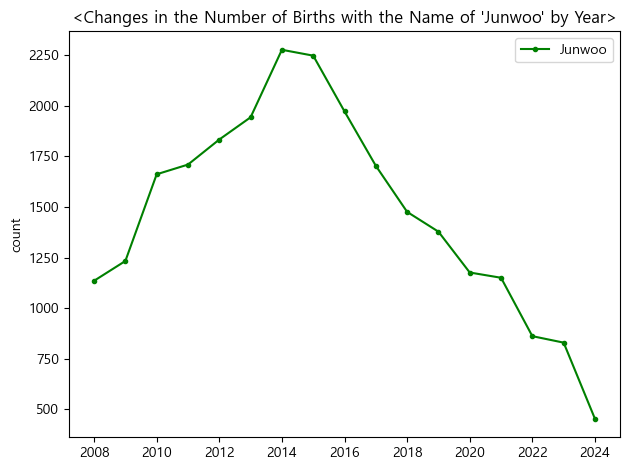

In [10]:
plt.plot(df_m.loc[df_m['name'] == '준우', ['year','count']].set_index('year'), marker='o', ms=3, color='green', label="Junwoo")
plt.legend()
plt.ylabel("count")
plt.title("<Changes in the Number of Births with the Name of 'Junwoo' by Year>")
plt.tight_layout()
plt.show()